In [28]:
%matplotlib inline
import pandas as pd
import feature_description
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import seaborn as sns

In [29]:
# тренировочная выборка
data = pd.read_csv('features.csv', index_col='match_id')
data.head(10)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,4,4,0,-43.0,1453,0,512,2038,0,63
8,1430293701,1,8,3,967,1136,7,1,0,8,...,6,3,0,10.0,1968,0,1536,1983,12,63
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,3,4,0,-15.0,4079,1,1540,0,63,0
11,1430308974,1,17,5,1527,906,10,0,1,7,...,3,4,0,26.0,3071,0,0,1572,0,63


In [30]:
#  Исследуем данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97230 entries, 0 to 114406
Columns: 108 entries, start_time to barracks_status_dire
dtypes: float64(12), int64(96)
memory usage: 80.9 MB


In [31]:
data.describe()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
count,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,...,97230.000000,97230.000000,97230.000000,95404.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000
mean,1.444232e+09,2.630999,51.517104,3.442672,1233.405801,1147.899702,11.231996,0.357009,0.362285,8.271315,...,3.349553,2.448339,0.689119,-6.901922,2332.247886,0.518503,1309.227790,1286.310820,40.599095,41.337036
std,5.515393e+06,2.835761,32.564211,1.111741,566.588895,464.111662,9.041620,0.663889,0.626704,2.497575,...,1.155609,0.813459,0.710122,40.701397,715.806850,0.499660,853.921365,851.009148,27.871645,27.064873
min,1.430199e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-84.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.440815e+09,1.000000,22.000000,3.000000,767.000000,746.000000,2.000000,0.000000,0.000000,7.000000,...,3.000000,2.000000,0.000000,-31.000000,1818.000000,0.000000,36.000000,256.000000,3.000000,3.000000
50%,1.446338e+09,1.000000,50.000000,3.000000,1175.000000,1113.000000,11.000000,0.000000,0.000000,8.000000,...,3.000000,2.000000,1.000000,-16.000000,2268.000000,1.000000,1824.000000,1798.000000,63.000000,60.000000
75%,1.448829e+09,7.000000,75.000000,4.000000,1704.000000,1479.000000,19.000000,1.000000,1.000000,10.000000,...,4.000000,3.000000,1.000000,8.000000,2778.000000,1.000000,1974.000000,1974.000000,63.000000,63.000000
max,1.450313e+09,7.000000,112.000000,6.000000,3319.000000,4332.000000,47.000000,8.000000,5.000000,34.000000,...,9.000000,9.000000,13.000000,300.000000,8452.000000,1.000000,2047.000000,2047.000000,63.000000,63.000000


In [32]:
# Пропуски
nan_features = [item for item,value in data.count().iteritems() if value < data.shape[0]]
nan_features


['first_blood_time',
 'first_blood_team',
 'first_blood_player1',
 'first_blood_player2',
 'radiant_bottle_time',
 'radiant_courier_time',
 'radiant_flying_courier_time',
 'radiant_first_ward_time',
 'dire_bottle_time',
 'dire_courier_time',
 'dire_flying_courier_time',
 'dire_first_ward_time']

In [ ]:
# Обоснование пропусков 
"""
first_blood_player2 (второй игрок, причастный к событию) - первое убийство может быть совершено одним игроком, это достаточно частое явление и происходит в 45% случаев
first_blood_time (игровое время первой крови) - в 20% случаев первой крови нет в первые 5 минут игры
"""

In [33]:
data[nan_features].describe()

,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_first_ward_time
count,77677.000000,77677.000000,77677.000000,53243.000000,81539.000000,96538.000000,69751.000000,95394.000000,81087.000000,96554.000000,71132.000000,95404.000000
mean,97.688029,0.521815,4.593483,4.383224,126.800255,-80.059510,215.987126,-6.875747,127.215028,-80.191893,214.870536,-6.901922
std,82.625879,0.499527,2.886984,2.870915,61.427907,15.814209,34.604997,39.508650,62.442018,15.261950,34.137158,40.701397
min,-78.000000,0.000000,0.000000,0.000000,-37.000000,-90.000000,180.000000,-236.000000,-45.000000,-90.000000,180.000000,-84.000000
25%,15.000000,0.000000,2.000000,2.000000,84.000000,-86.000000,186.000000,-31.000000,83.000000,-86.000000,185.000000,-31.000000
50%,93.000000,1.000000,5.000000,4.000000,131.000000,-83.000000,204.000000,-15.000000,131.000000,-84.000000,203.000000,-16.000000
75%,155.000000,1.000000,7.000000,7.000000,164.000000,-79.000000,241.000000,9.000000,165.000000,-79.000000,238.000000,8.000000
max,300.000000,1.000000,9.000000,9.000000,300.000000,300.000000,300.000000,300.000000,300.000000,296.000000,300.000000,300.000000


In [34]:
data.fillna(0)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,4,4,0,-43.0,1453,0,512,2038,0,63
8,1430293701,1,8,3,967,1136,7,1,0,8,...,6,3,0,10.0,1968,0,1536,1983,12,63
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,3,4,0,-15.0,4079,1,1540,0,63,0
11,1430308974,1,17,5,1527,906,10,0,1,7,...,3,4,0,26.0,3071,0,0,1572,0,63


In [41]:
data.isnull().sum().sum()

0

In [35]:
# Заполняем пропуски
def fill_na(data, nan_features):
    time = [f for f in nan_features if f.find('time') != -1] # списко занчений где присутствует time
    categorical = [f for f in nan_features if f.find('time') == -1]
    
    data[time] = data[time].fillna(0)
    data[categorical] = data[categorical].fillna(-1)
    
    return data

fill_na(data, nan_features)
[item for item,value in data.count().iteritems() if value < data.shape[0]]

[]

In [36]:
# Избавляемся от признаков
def get_X(data):
    try:
        return data.drop(['start_time','duration','radiant_win', 
             'tower_status_radiant', 
             'tower_status_dire', 
             'barracks_status_radiant', 
             'barracks_status_dire'], axis=1)
    except KeyError as error:
        print(error)
def get_Y(data):
    return data['radiant_win']

In [37]:
# Целевые переменные
X = get_X(data)
y = get_Y(data)


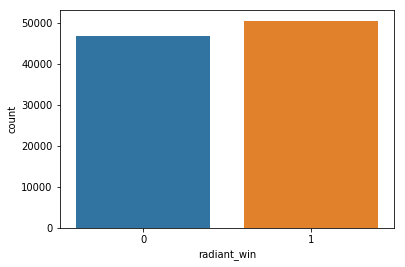

In [38]:
sns.countplot(data=data, x='radiant_win')
# Данные достаточно сбалансированные

In [39]:
# Вспомогательная функция, проверяющая качество классификатора
def examine(clf, X, y, scoring='roc_auc'):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    start_time = datetime.datetime.now()
    scores = cross_val_score(clf,X, y,scoring=scoring, cv=cv,n_jobs=-1)
    end_time = datetime.datetime.now()
    result = (clf.__class__.__name__, scoring, scores.mean(), scores.std()*2, end_time-start_time)

    return result

def get_report(result):
    print('{0}. {1} {2:.5f} +-{3:.5f}. Time to fit {4}'.format(result[0], result[1], result[2], result[3], result[4]))

In [42]:
# Классификаторы 
classifiers = [GradientBoostingClassifier(n_estimators=23, random_state=42),
              LogisticRegression(C=0.1,random_state=42, n_jobs=-1)]

result = [examine(clf, X,y) for clf in classifiers]
result = sorted(result, key=lambda el: el[2])

for r in result:
    get_report(r)

/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


GradientBoostingClassifier. roc_auc 0.68500 +-0.00444. Time to fit 0:00:47.355648
LogisticRegression. roc_auc 0.71647 +-0.00250. Time to fit 0:01:12.334324


In [ ]:
"""
Удаление категориальных признаков не повлияло на качество предсказания. качество показателя AUC-ROC так же равно 0.71.
"""

In [43]:
# Градиентный бустинг (отдельно)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
nums = [10, 20, 30, 50, 100, 250]
for n in nums:
    print ('#', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    print ('Time elapsed:', datetime.datetime.now() - start_time)
    print (model_scores)
    scores.append(np.mean(model_scores))


# 10
Time elapsed: 0:00:24.060852
[0.66383799 0.66635457 0.66360048 0.66529818 0.66516222]
# 20
Time elapsed: 0:00:42.491787
[0.68083889 0.68272733 0.67969876 0.6834932  0.6855512 ]
# 30
Time elapsed: 0:01:07.604528
[0.68892093 0.68934663 0.68712298 0.69180598 0.69283583]
# 50
Time elapsed: 0:01:51.721501
[0.69627399 0.69755612 0.69475348 0.699154   0.69973114]
# 100
Time elapsed: 0:03:49.985171
[0.70513323 0.70594747 0.70417106 0.70727245 0.70848348]
# 250
Time elapsed: 0:10:31.519593
[0.71572652 0.71530062 0.71442585 0.71717172 0.71765872]


In [ ]:

"""
Время кросс-валидация для градиентного бустинга с 30 деревьями состоявляет 0:01:07.604528
Увеличение количества деревьев также увеличивает показатель метрики AUC-ROC, приближая его к 0.72. Для достижения большего качества имеет смысл использовать более 30 деревьев. Для ускорения обучения можно использовать не всю выборку, а так же уменьшить глубину деревьев 
"""

In [44]:
heroes = pd.read_csv('heroes.csv')
print ('Всего героев в игре:', len(heroes))

Всего героев в игре: 112


In [45]:
# Мешок слов
def wordBag(X, N):
    X_pick = np.zeros((X.shape[0], N))
    
    for i, match_id in enumerate(X.index):
        for p in range(5):
            X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
    
    return X_pick

In [46]:
# Логистическая регрессия c обычным мешком слов
bag = wordBag(data, len(heroes))
get_report(examine(LogisticRegression(), pd.DataFrame(bag, index=data.index), y))

/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


LogisticRegression. roc_auc 0.60777 +-0.00766. Time to fit 0:00:03.474097


In [47]:
# Формируем новый мешок слов, связываем и золото и опыт 

def wordBagExp(X, N):
    X_pick = np.zeros((X.shape[0], N))
    
    for i, match_id in enumerate(X.index):
        for p in range(5):
            X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = X.ix[match_id, 'r%d_gold' % (p+1)] * X.ix[match_id, 'r%d_xp' % (p+1)] 
            X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1 * X.ix[match_id, 'd%d_gold' % (p+1)] * X.ix[match_id, 'd%d_xp' % (p+1)]
    
    return X_pick

In [48]:
# Логистическая регрессия c расширенным мешком слов
best_with_C = []
bag = wordBagExp(data, len(heroes))
C_pow_range = range(-5, 6)
C_range = [10.0 ** i for i in C_pow_range]
for C in C_range:
    print(C)
    best_with_C.append(get_report(examine(LogisticRegression(C=C, n_jobs=-1), pd.DataFrame(bag, index=data.index), y)))

/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


1e-05


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression. roc_auc 0.74126 +-0.00571. Time to fit 0:00:03.769726
0.0001


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression. roc_auc 0.74126 +-0.00571. Time to fit 0:00:03.823498
0.001


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression. roc_auc 0.74126 +-0.00571. Time to fit 0:00:04.099600
0.01


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression. roc_auc 0.74126 +-0.00571. Time to fit 0:00:03.612426
0.1


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression. roc_auc 0.74126 +-0.00571. Time to fit 0:00:03.598459
1.0


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression. roc_auc 0.74126 +-0.00571. Time to fit 0:00:03.629592
10.0


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression. roc_auc 0.74126 +-0.00571. Time to fit 0:00:03.637572
100.0


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression. roc_auc 0.74126 +-0.00571. Time to fit 0:00:05.743773
1000.0


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression. roc_auc 0.74126 +-0.00571. Time to fit 0:00:04.420369
10000.0


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression. roc_auc 0.74126 +-0.00571. Time to fit 0:00:04.543903
100000.0


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression. roc_auc 0.74126 +-0.00571. Time to fit 0:00:04.333622


In [ ]:
# Лучший результат логистической регрессии - 0.74126

In [60]:
model_test = LogisticRegression(C=0.1, random_state=42, n_jobs=-1)
model_test.fit(X,y)


/Users/alexeynikitin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
X_test = pd.read_csv('features_test.csv', index_col='match_id')


In [113]:

X_test.fillna(0)
fill_na(X_test, nan_features)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
6,1430287923,0,93,4,1103,1089,8,0,1,9,...,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
7,1430293357,1,20,2,556,570,1,0,0,9,...,2,-29.0,168.0,-54.0,0.0,3,2,2,1,16.0
10,1430301774,1,112,2,751,808,1,0,0,13,...,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
13,1430323933,1,27,3,708,903,1,1,1,11,...,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
16,1430331112,1,39,4,1259,661,4,0,0,9,...,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0
18,1430334264,0,97,5,2067,1549,15,0,0,8,...,0,243.0,260.0,-55.0,279.0,3,5,2,0,34.0
19,1430334995,1,97,4,1862,1487,24,0,1,5,...,0,17.0,0.0,-84.0,209.0,4,3,2,1,-32.0
24,1430349466,1,106,5,1991,1983,19,2,0,10,...,0,-25.0,73.0,-87.0,0.0,2,5,2,1,-35.0
33,1430366484,1,57,2,517,500,0,0,1,9,...,1,119.0,76.0,-86.0,237.0,1,3,2,2,0.0
